In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Read CSV file
df1 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection1.csv")
df2 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection2.csv")
df3 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection3.csv")
df4 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection4.csv")
df5 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection5.csv")
df6 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection6.csv")
df7 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection7.csv")
emotion_csv = pd.concat([df1,df2,df3, df4, df5, df6, df7])

In [3]:
emotion_csv


,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,0.0,Sad
7174,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.0,0.0,0.0,Sad
7175,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1245.0,0.0,0.0,0.0,Sad
7176,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,Sad


In [4]:
# list of columns
list(emotion_csv.columns)

['face',
 'confidence',
 'gaze_0_x',
 'gaze_0_y',
 'gaze_0_z',
 'gaze_1_x',
 'gaze_1_y',
 'gaze_1_z',
 'gaze_angle_x',
 'gaze_angle_y',
 'eye_lmk_x_0',
 'eye_lmk_x_1',
 'eye_lmk_x_2',
 'eye_lmk_x_3',
 'eye_lmk_x_4',
 'eye_lmk_x_5',
 'eye_lmk_x_6',
 'eye_lmk_x_7',
 'eye_lmk_x_8',
 'eye_lmk_x_9',
 'eye_lmk_x_10',
 'eye_lmk_x_11',
 'eye_lmk_x_12',
 'eye_lmk_x_13',
 'eye_lmk_x_14',
 'eye_lmk_x_15',
 'eye_lmk_x_16',
 'eye_lmk_x_17',
 'eye_lmk_x_18',
 'eye_lmk_x_19',
 'eye_lmk_x_20',
 'eye_lmk_x_21',
 'eye_lmk_x_22',
 'eye_lmk_x_23',
 'eye_lmk_x_24',
 'eye_lmk_x_25',
 'eye_lmk_x_26',
 'eye_lmk_x_27',
 'eye_lmk_x_28',
 'eye_lmk_x_29',
 'eye_lmk_x_30',
 'eye_lmk_x_31',
 'eye_lmk_x_32',
 'eye_lmk_x_33',
 'eye_lmk_x_34',
 'eye_lmk_x_35',
 'eye_lmk_x_36',
 'eye_lmk_x_37',
 'eye_lmk_x_38',
 'eye_lmk_x_39',
 'eye_lmk_x_40',
 'eye_lmk_x_41',
 'eye_lmk_x_42',
 'eye_lmk_x_43',
 'eye_lmk_x_44',
 'eye_lmk_x_45',
 'eye_lmk_x_46',
 'eye_lmk_x_47',
 'eye_lmk_x_48',
 'eye_lmk_x_49',
 'eye_lmk_x_50',
 'eye_l

## Class Imbalance

In [5]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       24538
Neutral     15290
Sad         14854
Anger       12903
Surprise    11166
Fear        10796
Disgust      1910
Contempt      239
Name: Emotion Detected, dtype: int64

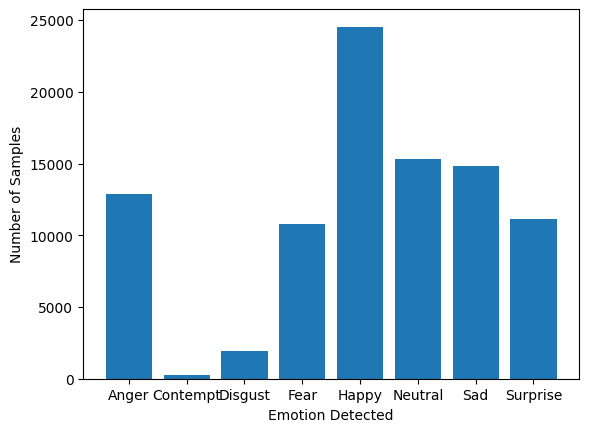

In [6]:
# Plot the class imbalance
unique, counts = np.unique(emotion_csv["Emotion Detected"], return_counts=True)
plt.bar(unique, counts)
plt.xticks()
plt.ylabel('Number of Samples')
plt.xlabel('Emotion Detected')
plt.show()

In [32]:
""" 
To deal with the class imbalance we are taking the following approaches:
- Remove the emotions contempt and disgust 
- Oversample the emotions: contempt and disgust
- Undersample the emotion: Happy
"""

# 1. Remove the emotions: Contempt and Disgust

emotion_csv_without_c_d = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 'Contempt'].index)
emotion_csv_without_c_d = emotion_csv_without_c_d.drop(emotion_csv_without_c_d[emotion_csv_without_c_d['Emotion Detected'] == 'Disgust'].index)
emotion_csv_without_c_d["Emotion Detected"].value_counts()

# Plot the class imbalance after removing the emotions
unique, counts = np.unique(emotion_csv_without_c_d["Emotion Detected"], return_counts=True)
plt.bar(unique, counts)
plt.xticks()
plt.ylabel('Number of Samples')
plt.xlabel('Emotion Detected')
plt.show()

Happy       22936
Neutral     15290
Sad         14854
Anger       12681
Surprise    11166
Fear        10360
Name: Emotion Detected, dtype: int64

In [ ]:
# 2. Oversample the emotions: Contempt and disgust

In [ ]:
# 3. Undersample the emotion: Happy

In [13]:
# Undersampling - Find a random undersampling
rus = RandomUnderSampler(random_state=42)

# Presenece AU
X_train_resampled_presence, y_train_resampled_presence = rus.fit_resample(emotion_presence, emotion_labels)

# Intensity Au
X_train_resampled_intensity, y_train_resampled_intensity = rus.fit_resample(emotion_intensity, emotion_labels)

# 3-D Facial Landmark
X_train_resampled_3dlandmark, y_train_resampled_3dlandmark = rus.fit_resample(emotion_detecion_3d_landmarks, emotion_labels)

# All three features
X_train_resampled, y_train_resampled= rus.fit_resample(emotion_3_features, emotion_labels)


NameError: name 'emotion_presence' is not defined

Text(0.5, 0, 'Emotion Detected')

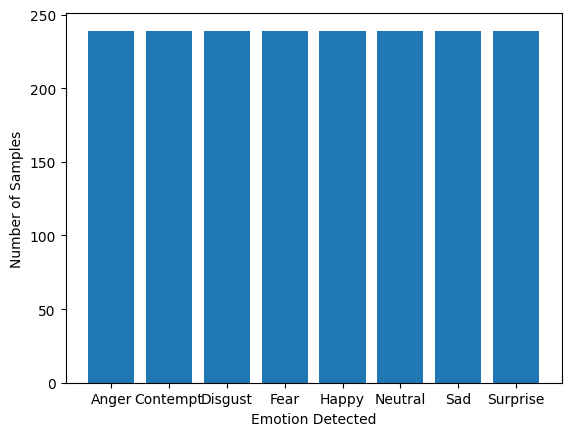

In [13]:
# Plot the class imbalance after resampling AU Presence
unique, counts = np.unique(y_train_resampled_presence, return_counts=True)
plt.bar(unique, counts)
plt.xticks()
plt.ylabel('Number of Samples')
plt.xlabel('Emotion Detected')

## Data Frames

In [7]:
# DF with class labels
emotion_labels = emotion_csv[['Emotion Detected']]
emotion_labels

,Emotion Detected
0,Anger
1,Anger
2,Anger
3,Anger
4,Anger
...,...
7173,Sad
7174,Sad
7175,Sad
7176,Sad


In [8]:
# Columns with the Action Unit Presence  
emotion_presence = emotion_csv[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',]]
emotion_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Columns with the Action Unit Intensity
emotion_intensity = emotion_csv[
['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r']]
emotion_intensity 


,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0.00,0.00,1.40,0.00,0.00,0.02,0.42,1.05,0.00,0.82,0.00,1.13,0.12,0.00,0.0,0.18,0.00
1,2.10,1.84,0.20,2.59,0.00,0.61,0.13,0.00,0.00,0.00,0.00,0.00,1.34,0.00,0.0,0.00,0.22
2,0.22,0.63,1.42,2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.83,1.22,0.14,0.96,0.0,0.00,0.00
3,0.00,0.00,0.00,2.17,0.00,0.19,0.18,1.25,0.00,0.70,0.68,1.06,1.03,0.40,0.0,1.00,0.00
4,0.00,0.00,1.55,0.00,1.01,1.85,0.54,0.00,0.22,0.48,0.00,0.99,0.90,0.24,0.0,0.00,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
7174,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
7175,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
7176,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


In [10]:
# CSV file made out of the 3d landmarks of face
emotion_detecion_3d_landmarks = emotion_csv[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67']]
emotion_detecion_3d_landmarks

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Z_58,Z_59,Z_60,Z_61,Z_62,Z_63,Z_64,Z_65,Z_66,Z_67
0,-92.5,-94.3,-96.9,-97.7,-92.1,-75.0,-47.0,-19.8,2.6,21.3,...,129.1,131.9,136.0,127.0,128.3,132.8,151.6,134.0,130.0,128.7
1,-113.4,-109.3,-103.4,-94.5,-81.1,-60.2,-36.5,-15.3,2.1,17.9,...,126.6,133.1,140.5,125.5,123.8,123.0,137.7,125.5,126.7,128.2
2,-63.1,-64.9,-64.2,-61.1,-55.8,-45.7,-31.9,-15.6,3.1,24.8,...,134.5,146.8,157.8,135.1,130.9,128.6,136.5,127.2,129.9,134.4
3,-75.4,-77.1,-76.4,-73.7,-67.0,-54.6,-38.6,-20.6,0.1,21.9,...,152.4,158.0,164.7,152.7,151.3,151.5,160.0,149.0,148.9,150.8
4,-103.4,-102.1,-100.3,-96.9,-87.2,-68.5,-44.1,-20.3,0.8,21.6,...,138.4,148.2,161.0,142.6,141.2,142.4,159.2,139.5,138.2,140.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7174,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7175,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7176,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4


In [11]:
emotion_3_features = emotion_csv[['AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67'
]]
emotion_3_features = emotion_3_features.fillna(0)
emotion_3_features

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,...,Z_58,Z_59,Z_60,Z_61,Z_62,Z_63,Z_64,Z_65,Z_66,Z_67
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,129.1,131.9,136.0,127.0,128.3,132.8,151.6,134.0,130.0,128.7
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,126.6,133.1,140.5,125.5,123.8,123.0,137.7,125.5,126.7,128.2
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.5,146.8,157.8,135.1,130.9,128.6,136.5,127.2,129.9,134.4
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,152.4,158.0,164.7,152.7,151.3,151.5,160.0,149.0,148.9,150.8
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,138.4,148.2,161.0,142.6,141.2,142.4,159.2,139.5,138.2,140.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4
7176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.3,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4


## Testing and Training 

In [16]:
# Train/Test on imbalanced data - Presence
X_train_presence, X_test_presence, y_train_presence, y_test_presence = train_test_split(emotion_presence, emotion_labels, test_size=0.33, random_state=42)

# Train/Test on resampled data - Presence
X_train_presence1, X_test_presence1, y_train_presence1, y_test_presence1= train_test_split(X_train_resampled_presence, y_train_resampled_presence, test_size=0.33, random_state=42)

In [17]:
# Train/Test on imbalanced data - Intensity
X_train_intensity, X_test_intensity, y_train_intensity, y_test_intensity  = train_test_split(emotion_intensity, emotion_labels, test_size=0.33, random_state=42)

# Train/Test on resampled data - Intentsity
X_train_intensity1, X_test_intensity1, y_train_intensity1, y_test_intensity1= train_test_split(X_train_resampled_intensity, y_train_resampled_intensity, test_size=0.33, random_state=42)

In [18]:
# Train/Test on imbalanced data - 3D Facial Landmark
X_train_landmarks, X_test_landmarks, y_train_landmarks, y_test_landmarks = train_test_split(emotion_detecion_3d_landmarks, emotion_labels, test_size=0.33, random_state=42)

# Train/Test on resampled data - 3d Facial Landmark
X_train_landmarks1, X_test_landmarks1, y_train_landmarks1, y_test_landmarks1 = train_test_split(X_train_resampled_3dlandmark, y_train_resampled_3dlandmark, test_size=0.33, random_state=42)

In [19]:
# Train/Test on imbalanced data - 3 features
X_train, X_test, y_train, y_test = train_test_split(emotion_3_features, emotion_labels, test_size=0.33, random_state=42)

# Train/Test on resampled data - 3 features
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_resampled, y_train_resampled, test_size=0.33, random_state=42)

## Models

### Support Vector Machine

In [20]:
# Support Vector Machine 
svm_model = svm.SVC()

#Training and Testing on AU Presence

# Train the SVM model based on the regular set
svm_model.fit(X_train_presence, y_train_presence)
svm_prediction_presenece_1 = svm_model.predict(X_test_presence)

# Train the SVM model based on resampled set
svm_model.fit(X_train_presence1, y_train_presence1)
svm_prediction_presenece_2 = svm_model.predict(X_test_presence1)

# Train SVM Model bsed on regular set and class weights
svm_model_weighted = svm.SVC(class_weight='balanced')
svm_model_weighted.fit(X_train_intensity, y_train_intensity)
svm_prediction_presenece_3 = svm_model_weighted.predict(X_test_intensity)

# Support Vector Machine - Training and Testing on AU Intensity

# Train the SVM model based on the regular set
svm_model.fit(X_train_intensity, y_train_intensity)
svm_prediction_intensity_1 = svm_model.predict(X_test_intensity)

# Train the SVM model based on resampled set
svm_model.fit(X_train_intensity1, y_train_intensity1)
svm_prediction_intensity_2 = svm_model.predict(X_test_intensity1)

# Train SVM Model bsed on regular set and class weights
svm_model_weighted = svm.SVC(class_weight='balanced')
svm_model_weighted.fit(X_train_intensity, y_train_intensity)
svm_prediction_intensity_3 = svm_model_weighted.predict(X_test_intensity)

# Support Vector Machine - Training and Testing on 3d Facial Landmark

# Train the SVM model based on the regular set
svm_model.fit(X_train_landmarks, y_train_landmarks)
svm_prediction_landmarks_1 = svm_model.predict(X_test_landmarks)

# Train the SVM model based on resampled set
svm_model.fit(X_train_landmarks1, y_train_landmarks1)
svm_prediction_landmarks_2 = svm_model.predict(X_test_landmarks1)

# Train SVM Model bsed on regular set and class weights
svm_model_weighted = svm.SVC(class_weight='balanced')
svm_model_weighted.fit(X_train_landmarks, y_train_landmarks)
svm_prediction_landmarks_3 = svm_model_weighted.predict(X_test_landmarks)

# -- 3 Features --
# Train the SVM model based on the regular set
svm_model.fit(X_train, y_train)
svm_1 = svm_model.predict(X_test)

# Train the SVM model based on resampled set
svm_model.fit(X_train_1, y_train_1)
svm_2 = svm_model.predict(X_test_1)

# Train SVM Model bsed on regular set and class weights
svm_model_weighted = svm.SVC(class_weight='balanced')
svm_model_weighted.fit(X_train, y_train)
svm_3 = svm_model_weighted.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

### Decision Tree

In [ ]:
# Decision Tree 
tree = DecisionTreeClassifier()
tree_weighted = DecisionTreeClassifier(class_weight='balanced')

# AU Presence on regular set
tree = tree.fit(X_train_presence, y_train_presence)
tree_pred_pres_1 = tree.predict(X_test_presence)

# AU Presence on resampled set
tree = tree.fit(X_train_presence1, y_train_presence1)
tree_pred_pres_2 = tree.predict(X_test_presence1)

# AU Presence on regular set class weight
tree_weighted = tree_weighted.fit(X_train_presence, y_train_presence)
tree_pred_pres_3 = tree_weighted.predict(X_test_presence)

# AU Intensity on regular set
tree = tree.fit(X_train_intensity, y_train_intensity)
tree_pred_int_1 = tree.predict(X_test_intensity)

# AU Intensity on resampled set
tree = tree.fit(X_train_intensity1, y_train_intensity1)
tree_pred_int_2 = tree.predict(X_test_intensity1)

# AU Intensity on regular set class weight
tree_weighted = tree_weighted.fit(X_train_intensity, y_train_intensity)
tree_pred_int_3 = tree_weighted.predict(X_test_intensity)

# Landmarks on regular set
tree = tree.fit(X_train_landmarks, y_train_landmarks)
tree_pred_landmark_1 = tree.predict(X_test_landmarks)

# Landmarks on resampled set
tree = tree.fit(X_train_landmarks1, y_train_landmarks1)
tree_pred_landmark_2 = tree.predict(X_test_landmarks1)

# Landmarks on regular set class weight
tree_weighted = tree_weighted.fit(X_train_landmarks, y_train_landmarks)
tree_pred_landmark_3 = tree_weighted.predict(X_test_landmarks)

# -- 3 Features --
#  regular set
tree.fit(X_train, y_train)
tree_1 = tree.predict(X_test)

# resampled set
tree.fit(X_train_1, y_train_1)
tree_2 = tree.predict(X_test_1)

# regular set and class weights
tree_weighted = svm.SVC(class_weight='balanced')
tree_weighted.fit(X_train, y_train)
tree_weighted_3 = tree_weighted.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
# Random Forest 
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest_weighted = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced")

# -- AU Presence --

# Regular Subset
forest = forest.fit(X_train_presence, y_train_presence)
forest_pred_pres_1 = forest.predict(X_test_presence)

# Regular Subset w/ class weight
forest_weighted = forest_weighted.fit(X_train_presence, y_train_presence)
forest_pred_pres_weight = forest_weighted.predict(X_test_presence)

# rebalancde subset
forest = forest.fit(X_train_presence1, y_train_presence1)
forest_pred_pres_2 = forest.predict(X_test_presence1)

# --- AU Intensity --

# Regular Subset
forest = forest.fit(X_train_intensity, y_train_intensity)
forest_pred_int_1 = forest.predict(X_test_intensity)

# Regular Subset w/ class weight
forest_weighted = forest_weighted.fit(X_train_intensity, y_train_intensity)
forest_pred_inten_weight = forest_weighted.predict(X_test_intensity)

# rebalanced subset
forest = forest.fit(X_train_intensity1, y_train_intensity1)
forest_pred_int_2 = forest.predict(X_test_intensity1)

# -- Facial Landmark --

# Regular Subset
forest = forest.fit(X_train_landmarks, y_train_landmarks)
forest_pred_landmark1 = forest.predict(X_test_landmarks)

# Regular Subset w/ class weight
forest_weighted = forest_weighted.fit(X_train_landmarks1, y_train_landmarks1)
forest_pred_landmark_weight = forest_weighted.predict(X_test_landmarks1)

# rebalancde subset
forest = forest.fit(X_train_landmarks1, y_train_landmarks1)
forest_pred_landmark2 = forest.predict(X_test_landmarks1)

# -- 3 Features --
#  regular set
forest.fit(X_train, y_train)
forest_1 = forest.predict(X_test)

# resampled set
forest.fit(X_train_1, y_train_1)
forest_2 = forest.predict(X_test_1)

# regular set and class weights
forest_weighted = svm.SVC(class_weight='balanced')
forest_weighted.fit(X_train, y_train)
forest_3 = forest_weighted.predict(X_test)


/var/folders/g6/yg8vcpd92j9_lff07zrhgf9h0000gn/T/ipykernel_15621/3179008756.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train_presence, y_train_presence)
/var/folders/g6/yg8vcpd92j9_lff07zrhgf9h0000gn/T/ipykernel_15621/3179008756.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_weighted = forest_weighted.fit(X_train_presence, y_train_presence)
/var/folders/g6/yg8vcpd92j9_lff07zrhgf9h0000gn/T/ipykernel_15621/3179008756.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train_presence1, y_train_presence1)
/var/folders/g6/yg8vcpd92j9_lff07zrhgf9h0000gn/T/ipykernel_15621/3179008756.py:22: DataConver

## Reports

In [ ]:
# Metircs on how well the models performed
def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    # Confusion Matrix Prediciton 
    print("Confusin Matrix Score")
    print(confusion_matrix(y_label_training, y_label_prediction))

    # 